<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multi-Variable Logistic Regression and Classification Matrix

_Authors: Sam Stack(DC)_


**Exercise Objectives**
- Hand on experience using Multi-Variable Logistic Regression
- Review and Exploration of the Classification Matrix and its evaluation Metrics
- Introduction to One vs. One and One vs. Rest Classifiers.

**Lets get some data.**
One of the most popular classification datasets for Machine learning is the Iris Dataset, which can be loaded directly from `sklearn.datasets`
- Sklearn datasets are imported as dictionaries and use keys to access specific aspects.
    - `iris.data` : actual matrix of observations
    - `iris.target` : target column for classification
    - `iris.feature_names` :  column names

In [70]:
import seaborn as sns
import pandas as pd
from sklearn import datasets # import built-in datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

import matplotlib.pyplot as plt

#### Load and examine data

In [23]:
# load the data
iris = datasets.load_iris()

# examine what we loaded
print(type(iris))

print('='*100)

#looks like a dictionary
print(iris.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [24]:
# Examine the data
print("feature_names:", iris['feature_names'])
print('='*100)
print("target_names:", iris['target_names'])
print('='*100)
print("DESCR:", iris['DESCR'])
print('='*100)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0

#### Prepare the data set

In [25]:
# look at the values
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [26]:
# features
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# target values
print(type(y))
y[:200]

<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Break down of classes**  
0 : Setosa  
1 : Versicolour  
2 : Virginica  

----

**Modelling**
This data is extreamly neat and tidy so no cleaning necessary and we can get right into modelling.

#### Visualize

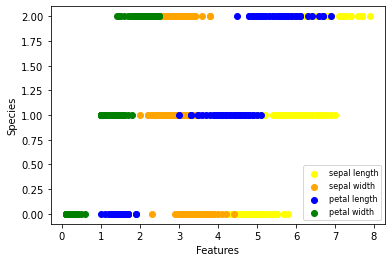

In [36]:
# Plot the relationship of the features to the target species
plt.xlabel('Features')
plt.ylabel('Species')

pltX = X.loc[:, 'sepal length (cm)']
pltY = y
plt.scatter(pltX, pltY, color='yellow', label='sepal length')

pltX = X.loc[:, 'sepal width (cm)']
pltY = y
plt.scatter(pltX, pltY, color='orange', label='sepal width')

pltX = X.loc[:, 'petal length (cm)']
pltY = y
plt.scatter(pltX, pltY, color='blue', label='petal length')

pltX = X.loc[:, 'petal width (cm)']
pltY = y
plt.scatter(pltX, pltY, color='green', label='petal width')

plt.legend(loc=4, prop={'size': 8})
plt.show()

#### # Model the data

In [38]:
# split the data to 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [40]:
# train the model
model = LogisticRegression()
model.fit(x_train,y_train)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Test the model

In [45]:
# model.predict
predictions = model.predict(x_test)

print("Predictions:", predictions)
print('='*100)
print("Actuals    :", y_test)

Predictions: [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 1 1 1 1 2 2]
Actuals    : [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2]


#### Predictions look pretty good!

In [47]:
# evaluated model preformance with a confusion matrix.
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 8  0  0]
 [ 0  8  0]
 [ 0  2 12]]


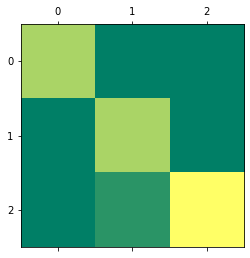

In [51]:
# plt the matrix
plt.matshow(confusion_matrix, cmap=plt.cm.summer)
plt.show()

With a multivariable confusion matrix, some of our labellings (True Pos., True Neg., False Pos., False Neg.) get a little warped.  We are no longer predicting one class from a null class we are classifiying into 3 distinguished classes.  

The **True** diagonal stays the same as these are properly classified observations.  


|   Actual/Pred | Class 0 | Class 1  | Class 2 |
| --- | ------- |:--------:| -------:|
| **Pred Class 0**  | 15      | 0        | 0       |
| **Pred Class 1**    | 0       | 11       |   0     |
| **Pred Class 2**    | 0       | 1        |    11   |


It is better to stick with True and False labels with multi-class to avoid ...[_Confusion_](https://www.youtube.com/watch?v=bcYppAs6ZdI)

If you need to reffer to a False Positive or True Negative it is better to first select a specific class, such as `Class 2 ` and refer to classification or misclassification relative to said choosen class instead of the set of all classes as a whole. 

Example:
    _True Negatives relative to Class 2 are True Positives for Class 0 and Class 1._

Speaking of our Classes?  How are probabilities calculated with multi class?
- Are they Probability of `Class 0` vs. `Not Class 0`?
- Or Probability of `Class 0` vs. `Class 1` vs. `Class 2` ?

In [57]:
# use predict_proba to find out.
probability = model.predict_proba(x_test)
print(probability)

[[1.80708412e-02 9.19387412e-01 6.25417472e-02]
 [6.42326622e-03 9.09500963e-01 8.40757710e-02]
 [9.64759699e-01 3.52400510e-02 2.49518832e-07]
 [2.86599239e-03 8.14512228e-01 1.82621780e-01]
 [1.08490508e-04 2.77779171e-01 7.22112338e-01]
 [2.22835174e-06 7.37233387e-03 9.92625438e-01]
 [9.43217689e-01 5.67814949e-02 8.15766342e-07]
 [9.78582366e-01 2.14175354e-02 9.90068602e-08]
 [1.14410606e-04 1.60398542e-01 8.39487047e-01]
 [1.14978741e-05 3.52886503e-02 9.64699852e-01]
 [4.62372616e-06 2.05902743e-02 9.79405102e-01]
 [9.81549664e-01 1.84502648e-02 7.07531720e-08]
 [2.27913897e-05 2.63498465e-02 9.73627362e-01]
 [3.54261343e-03 7.88499715e-01 2.07957671e-01]
 [1.59581736e-04 1.42951228e-01 8.56889190e-01]
 [8.20789778e-03 9.33016155e-01 5.87759470e-02]
 [2.05036061e-03 4.80771658e-01 5.17177982e-01]
 [9.71310036e-01 2.86898409e-02 1.23559601e-07]
 [4.46805330e-03 7.04449351e-01 2.91082596e-01]
 [9.86567312e-06 7.29723208e-02 9.27017813e-01]
 [9.62665597e-01 3.73342608e-02 1.419187

In [58]:
print(probability.shape[0])
print(x_test.shape[0])

30
30


In [64]:
# readable data frame of probablity results
probability_df = pd.DataFrame(probability, columns=model.classes_)
probability_df['sum'] = probability_df.sum(axis=1)
probability_df.head(10)

,0,1,2,sum
0,0.018071,0.919387,6.254175e-02,1.0
1,0.006423,0.909501,8.407577e-02,1.0
2,0.964760,0.035240,2.495188e-07,1.0
3,0.002866,0.814512,1.826218e-01,1.0
4,0.000108,0.277779,7.221123e-01,1.0
5,0.000002,0.007372,9.926254e-01,1.0
6,0.943218,0.056781,8.157663e-07,1.0
7,0.978582,0.021418,9.900686e-08,1.0
8,0.000114,0.160399,8.394870e-01,1.0
9,0.000011,0.035289,9.646999e-01,1.0


In [67]:
# Add predictions and actuals
probability_df['predicted_class'] = predictions
probability_df['actual_class'] = y_test #.to_frame().reset_index().drop(columns='index')
probability_df.head(10)

,0,1,2,sum,predicted_class,actual_class
0,0.018071,0.919387,6.254175e-02,1.0,1,1
1,0.006423,0.909501,8.407577e-02,1.0,1,1
2,0.964760,0.035240,2.495188e-07,1.0,0,0
3,0.002866,0.814512,1.826218e-01,1.0,1,1
4,0.000108,0.277779,7.221123e-01,1.0,2,2
5,0.000002,0.007372,9.926254e-01,1.0,2,2
6,0.943218,0.056781,8.157663e-07,1.0,0,0
7,0.978582,0.021418,9.900686e-08,1.0,0,0
8,0.000114,0.160399,8.394870e-01,1.0,2,2
9,0.000011,0.035289,9.646999e-01,1.0,2,2


Looks like our probabilities of each class all add up to 1, so it is like `Class 0` vs. `Class 1` vs. `Class 2`.

What if we wanted to create a logistic regression that has `Class 0` vs. `Class 1` & `Class 2` or just `Class 0` vs. `Class 2`?  We will cover that in a bit, but first more evaluation metrics.

---

**Classification Reports/Matrix**

Classification reports are another means of evauliation classification models and return a few metrics that are based on True Positives, False Positives and False Negatives.  

In [71]:
# Accuracy score
print(accuracy_score(y_test, predictions))

0.9333333333333333


In [73]:
# Check precision, recall, f1-score 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.80      1.00      0.89         8
           2       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



**Precision**  
- "How many of the items selected are relevant."
- Of the items placed into a class, how many of the are True Positives.


$$\frac{True Positives}{True Positives + False Positives}$$

**Recall**  
- "How many of the relevant items are selected."
- Of the items that were suppose to be placed into a class, how many did we accurately place.


$$\frac{True Positives}{True Positives + False Negatives}$$

**F1-Score**

F1 exists on a range of 0 - 1 where 0 is just aweful and 1 is perfection.
F1 is considered a harmonic mean as it averages Precision and Recall.  With classification models you often times have to chooise what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.  If you are uncertain which you should optimize, F1 score may be the metric of choice.

$$2*\frac{precision * recall}{precision + recall}$$

**Support**
Number of true observations in given class.  The count of possible true observations.  

---

## Intro to Ensembling

Earlier we talked about building models relative to class combinations.  Distinguishing One class from all other classes or just One specific class from another specific class.  These goals are possible with Logistic Regression.

Up until this point we have used one model, but there are also Machine Learning methods that involve combining several models to come to a more refined conclusion, commonly reffered to as Ensemble Methods.

### One Vs. Rest Classification.

One vs. Rest Classification is a method that builds an individual model for each class to try to distingush said specific class from the rest of the classes.  Since we are only focusing on one class, `Class 1` these classfiers will group `Class2`, `Class3`, `Class4` into a single class of `Not Class 1`.  Same all the way through for the rest of the classes.

1 - Class1 vs. Class2, Class3, Class4  
2 - Class2 vs. Class1, Class3, Class4  
3 - Class3 vs. Class1, Class2, Class4   
4 - Class4 vs. Class1, Class2, Class3  

### One Vs. One Classification.

We train a model for every set of classes.  As more classes are added this becomes more computationally expense.  

1 - Class1 vs. Class2  
2 - Class1 vs. Class3  
3 - Class1 vs. Class4  
4 - Class2 vs. Class3  
5 - Class2 vs. Class4  
6 - Class3 vs. Class4  


#### One Vs. Rest Classifier

In [ ]:
# import ensemble meth
od
# instantiate choose model
LR = LogisticRegression()
# place the model in the ensembler
OVC = OneVsRestClassifier(LR)
# use the ensemble method like a normal sklearn model.
OVC.fit(x_train, y_train)


# you can use the train test split you created earlier or do a new TTS.

In [ ]:
# use the .predict and confusion matrix the same way
y_pred = OVC.predict(x_test)

confusion_matrix(y_test, y_pred)

#### One Vs. One Classifier

In [ ]:
LR = LogisticRegression()
# OvO works the same as OvR

In [ ]:
# Make prediction and evaluate confusion matrix.

One Vs. One/Rest Classifiers are not restricted to fitting using Logistic Regression.  With SKLearn, any type of Classification model can be placed into the One Vs X classification ensemble.